# Math 104C Homework 1
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
Given the ODE $y' = f(t,y)$, let us construct the interpolating polynomial $p_2(t) \text{ of } y(t_n-\Delta t), y(t_n), y(t_n+\Delta t)$ and approximate $y'(t_n + \Delta t) \text{ by } p_2'(t_n + \Delta t)$ to derive BDF method. We can first use Lagrange Polynomial and then differentiate. <br/><br/>

Let k be $\Delta t$.<br/> 
$p_2(t)$
> $= \frac{(t-t_j)(t-t_j-k)}{(2k^2)}y(t_j-k) - \frac{(t-t_j-k)(t-t_j+k)}{k^2} y(t_j) + \frac{(t-t_j+k)(t-t_j)}{2k^2}y(t_j +k)$ <br/>

$p_2'(t_j)$
> $= \frac{(2t-t_j-t_j-k)}{2k^2}y(t_j-k) - \frac{(2t - t_j - t_j + k)}{k^2}y(t_j) + \frac{(2t-t_j+k-t_j)}{2k^2}y(t_j+k)$<br/>

$p'(t_j + k)$
> $= \frac{(2t_j+2k-2t_j-k)}{2k^2}y(t_j-k) - \frac{2k}{k^2}y(t_j) + t(\frac{3k}{2k^2})y(t_j+1)$<br/>

$p_2'(t_j+k)$
> $= \frac{y(t_j-k) - 4y(t_j) + 3y(t_j+k)}{2k}$ <br/>

Thus we have our desired approximation $\frac{3y_{n+1} - 4y_n + y_{n-1}}{2\Delta t} = f(t_{n+1}, y_{n+1})$


## Exercise 2
To show that the local truncation error of the midpoint method is $O(\Delta t)^3$, we have $\tau_{n+1} = y(t_{n+1}) - y(t_n) - \Delta tf\left(t_{n+1/2}, y(t_n) + \frac{\Delta t}{2}f(t_n, y(t_n))\right)$ for the explicit <em>midpoint Range-Kutta </em>method. Taylor expanding f around $(t_n, y(t_n))$ we obtain 
$$
\begin{align}
f\left(t_{n+1/2}, y(t_n)+\frac{\Delta t}{2}f(t_n, y(t_n))\right) &= f(t_n, y(t_n))\\
&+\frac{\Delta t}{2}\frac{\partial f}{\partial t}(t_n, y(t_n))\\
&+\frac{\Delta t}{2}f(t_n, y(t_n))\frac{\partial f}{\partial y}(t_n, y(t_n)) + O(\Delta t)^2
\end{align}
$$
But $y' = f, y'' = f'$ and 
$$f' = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}y' = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}f$$
Therefore 
$$f\left(t_{n+1/2}, y(t_n)+\frac{\Delta t}{2}f(t_n, y(t_n))\right) = y'(t_n)+\frac{1}{2}\Delta t y''(t_n) + O(\Delta t)^2$$

On the other hand $$y(t_{n+1}) = y(t_n) + \Delta ty'(t_n) +\frac{1}{2}(\Delta t)^2y''(t_n) +O(\Delta t)^3 \text{.}$$

Substituting the last two formulas with the explicit midpoint Runge-Kutta method we get $\tau_{n+1} = O(\Delta t)^3$.

## Exercise 3
Given the initial value problem 
$$\begin{align}
y'(t) &= \frac{3\cos t}{y^2(t)}, \quad 0 < t \leq \pi ,\\
y(0) &= 1.
\end{align}$$

#### (a) 
Let $y' = \frac{dy}{dt}$ we can rewrite the first equation as $\frac{dy}{dt} = \frac{3\cos t}{y^2(t)}$ and integrate.  
$$\begin{align}
\int y^2 dy &= \int3\cos t dt\\
\frac{y^3}{3} &= 3\sin t + C\\
y^3 &= 9\sin t + C \quad \text{let y = 1 and t = 0}\\
1 &= 9\sin 0 + C\\
C &= 1
\end{align}
$$
From this we have our exact solution as $y(t) = \sqrt[3]{9\sin t + 1}$.


#### (b), (c)
Implementation of Euler's method to find an approximation solution in cell below. 

In [64]:
import numpy as np 
from matplotlib import pyplot as plt 
#interval of (0,pi]
t0       = 0
y0       = 1
tf       = np.pi
n        = [4, 8, 16, 32, 64, 128]
approx   = []
actual_y = []

def euler(n):
    y      = np.zeros(n)
    actual = np.zeros(n)
    y[0]   = y0
    actual[0] = y0
    deltat = (tf - t0)/(n-1)
    t      = np.linspace(t0, tf, n)
    for i in range(1, n):
        y[i]      = deltat*((3*np.cos(t[i-1]))/ y[i-1]**2) + y[i-1]
        actual[i] = (9*np.sin(t[i-1])+1)**(1/3)
    return y, actual
err = []
for i in range(len(n)):
    approx, actual_y = euler(n[i])
    err.append(max(abs(actual_y-approx)))
    if i > 0:
        factor = err[i]/err[i-1]
        print("Time Step: ", n[i], " Error: ", max(abs(actual_y-approx)), " Decrease Factor: ", factor, '\n')
    else:
        print("Time Step: ", n[i], " Error: ", max(abs(actual_y-approx)), " Decrease Factor: -- ", '\n')

Time Step:  4  Error:  3.141592653589793  Decrease Factor: --  

Time Step:  8  Error:  1.3463968515384828  Decrease Factor:  0.42857142857142855 

Time Step:  16  Error:  0.6283185307179586  Decrease Factor:  0.4666666666666667 

Time Step:  32  Error:  0.3040250955086896  Decrease Factor:  0.48387096774193544 

Time Step:  64  Error:  0.14959965017094246  Decrease Factor:  0.49206349206349187 

Time Step:  128  Error:  0.07620481090078068  Decrease Factor:  0.5093916383741809 



Solution for when Delta t = pi/300


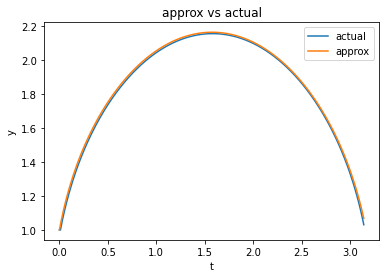

In [66]:
import numpy as np 
from matplotlib import pyplot as plt 
#interval of (0,pi]
t0     = 0
y0     = 1
tf     = np.pi
n      = [4, 8, 16, 32, 64, 128]
approx  = []
actual_y = []
# y      = np.zeros(n)
# actual = np.zeros(n)
# y[0]   = y0
t      = np.linspace(t0, tf, 301)

def euler(n):
    y      = np.zeros(n)
    actual = np.zeros(n)
    y[0]   = y0
    actual[0] = y0
    deltat = (tf - t0)/(n-1)
    t      = np.linspace(t0, tf, n)
    for i in range(1, n):
        y[i]      = deltat*((3*np.cos(t[i-1]))/ y[i-1]**2) + y[i-1]
        actual[i] = (9*np.sin(t[i-1])+1)**(1/3)
    return y, actual
    
approx, actual_y = euler(301)
    
plt.plot(t, actual_y, label = "actual")
plt.plot(t, approx, label = "approx")
plt.xlabel("t")
plt.ylabel("y")
plt.title("approx vs actual")
plt.legend()
print("Solution for when Delta t = pi/300")

## Exercise 4

#### (a)
Let $u = \theta'$,<br/> 
$\begin{align}
0 &= u' + \gamma u + \omega^2 \theta\\ 
-u' &= \gamma u + \omega^2 \theta
\end{align}$

Our first order system becomes: <br/> $-u' = -\gamma u -\omega^2\theta\\ \theta' = u$

#### (b) 
We need to find the exact solution of our second order ODE. This will help us find the order of convergence of Eulers Method approximation as well as the plot comparison. <br/>

First we want to write out the characteristic polynomial in the form of $ar^2 + br + c = 0$: $r^2 + 0.2r + 4 = 0$ <br/>

Now, use quadratic formula to solve for roots: $r = -\frac{1}{10}\pm\frac{\sqrt{399}}{10}i$<br/>

Complex root for characteristics equation: $\theta = e^{\lambda t}(c_1\cos(\mu t) + _2 \sin(\mu t))$ where $\mu = \frac{\sqrt{399}}{10}$ and $\lambda = -\frac{1}{10}$.<br/>

$$\begin{align}
\theta(t) &= e^{-\frac{1}{10}}\left(c_1\cos(\frac{\sqrt{399}}{10}t)+c_2\sin(\frac{\sqrt{399}}{10}t)\right)\\
\theta'(t) &= -\frac{1}{10}e^{-\frac{1}{10}}\left(c_1\cos(\frac{\sqrt{399}}{10}t) +c_2\sin(\frac{\sqrt{399}}{10}t)\right)+e^{-\frac{1}{10}}\left(-\frac{\sqrt{399}}{10}c_1\sin(\frac{\sqrt{399}}{10}t) + \frac{\sqrt{399}}{10}c_2\cos(\frac{399}{10}t)\right)
\end{align}
$$

Give that $\theta(0) = 1 \text{and} \theta'(0) = 1$ we have : 
$$ c_1 = 1 \text{ and } c_2 = \frac{1}{\sqrt{399}}$$<br/>

Thus $\theta(t) = e^{-\frac{1}{10}}\left(\cos(\frac{\sqrt{399}}{10}t) + \frac{\sin(\frac{\sqrt{399t}}{10})}{\sqrt{399}}\right)$

In [86]:
import numpy as np 
from matplotlib import pyplot as plt 
#interval of (0,pi]
t0           = 0
theta0       = 1
u0           = 0
tf           = 5
n            = [4, 8, 16, 32, 64, 128]
approx       = []
actual_theta = []
t            = np.linspace(t0, tf, 800)

def euler(n):
    u         = np.zeros(n)
    u[0]      = u0
    theta     = np.zeros(n)
    theta[0]  = theta0
    actual    = np.zeros(n)
    actual[0] = theta0
    deltat    = (tf - t0)/(n-1)
    c_1 = 1
    c_2 = 1./np.sqrt(399)
    for i in range(1, n):
        t      = np.linspace(t0, tf, n)
        u[i]      = deltat*(-0.2*u[i-1] - 4*theta[i-1]) + u[i-1]
        theta[i]  = u[i]
        theta[i]  = deltat*(u[i-1])+theta[i-1]
        v1 = np.sqrt(399)/10.
        v2 = 399/10.
        coeff = (-1/10.)*np.exp(-1/10.)
        actual[i] = coeff*(c_1*np.cos(v1 * t) + c_2 * np.sin(v1 * t)) + np.exp(-1/10.)*(-1 * v1 * c_1 * np.sin(v1 * t)) + v1 * c_2 * np.cos(v2 * t)
        print(theta, actual)
    return theta, actual 


err = []
for i in range(len(n)):
    approx, actual_theta = euler(n[i])
    err.append(max(abs(actual_theta-approx)))
    if i > 0:
        factor = err[i]/err[i-1]
        print("Time Step: ", n[i], " Error: ", max(abs(actual-approx_thetha)), " Decrease Factor: ", factor, '\n')
    else:
        print("Time Step: ", n[i], " Error: ", max(abs(actual-approx_theta)), " Decrease Factor: -- ", '\n')

ValueError: setting an array element with a sequence.